Minor project 
Submitted by:
## Kartik Soni
https://github.com/kartikson1

##### Objective : To understand how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course). 

### Problem Statement:
gender                                     : Gender of the student

race/ethnicity                         : Race of the Student As Group A/B/C

parental level of education  : What is the education Qualification of Students Parent

lunch                                        : Whether the lunch is Standard type/Free lunch or Some discounted lunch

test preparation course        : Whether Student has Taken or not and Completed

math score                              : Scores in Maths

reading score                          : Scores in Reading

writing score                           : Scores in Writing

Objective of this Analysis:¶
To understand how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).

What to do in  Exploratory Data Analysis:¶

To Analyse insights in the dataset.
To understand the connection between the variables and to uncover the underlying structure
To extract the import Variables
To detect anomalies
To test the underlying assumptions.
Provide Insights with Suitable Graphs and Visualizations.
Write all your inferences with supporting Analysis and Visualizations.

In [5]:

# importing all the necessary libraries first
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<h3>Clearly, the 3 scores are numerical variables, and the rest are categorical variables</h3>


Now, let's ensure there are no null values in our data

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

So clearly, there aren't any!

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From the above data, we can see the minimum, maximum, mean and median scores in all 3 subjects

So now, to visualize the data and make some derivations from it, I will plot some graphs.

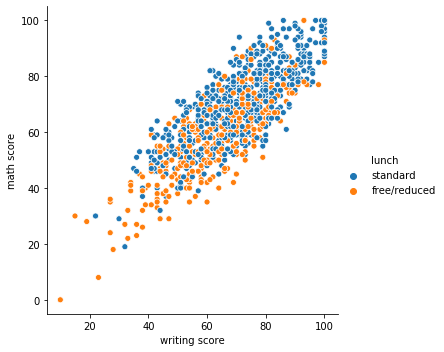

In [46]:
sns.relplot(x= 'writing score', y = 'math score', hue='lunch', data=df)

<h3> The above graph potentially indicates that students that get standard lunch at school score higher (towards 45 degrees) than people with free/reduced lunch. </h3>

But, let's explore more.

Here, I will create and add two more columns to the dataframe: total marks and percentage.

In [60]:
df['total marks']=df['math score']+df['reading score']+df['writing score']
df['percentage']=df['total marks']/300*100

Now, I'm going to define passing criteria for each subject, which is 50+ for all subjects.

In [69]:
df['math_passStat'] = np.where(df['math score']<50, 'Fail' ,'Pass')
df['reading_passStat'] = np.where(df['reading score']<50, 'Fail' ,'Pass')
df['writing_passStat'] = np.where(df['writing score']<50, 'Fail' ,'Pass')


Now, let's see what % of students passed and failed in each subject.

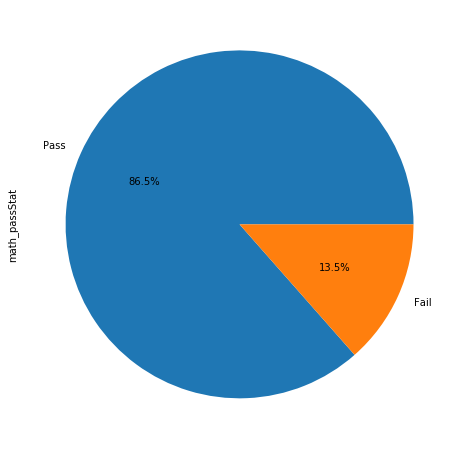

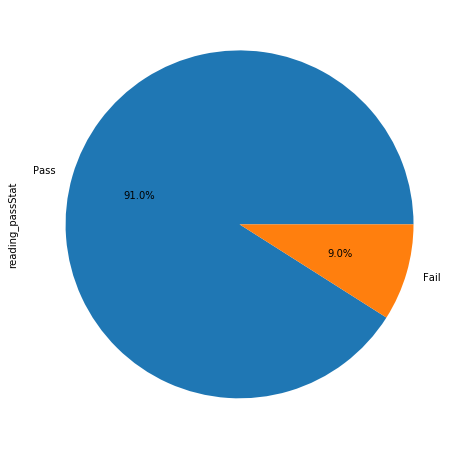

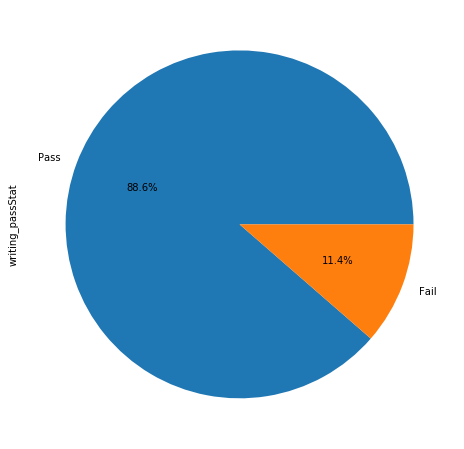

In [70]:
df['math_passStat'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

df['reading_passStat'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

df['writing_passStat'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<h4>Clearly, most students passed in reading, followed by writing and math.</h4>
This might also indicate that reading is the easiest subject, and math, the hardest.

<p> Now, let's plot some counterplots

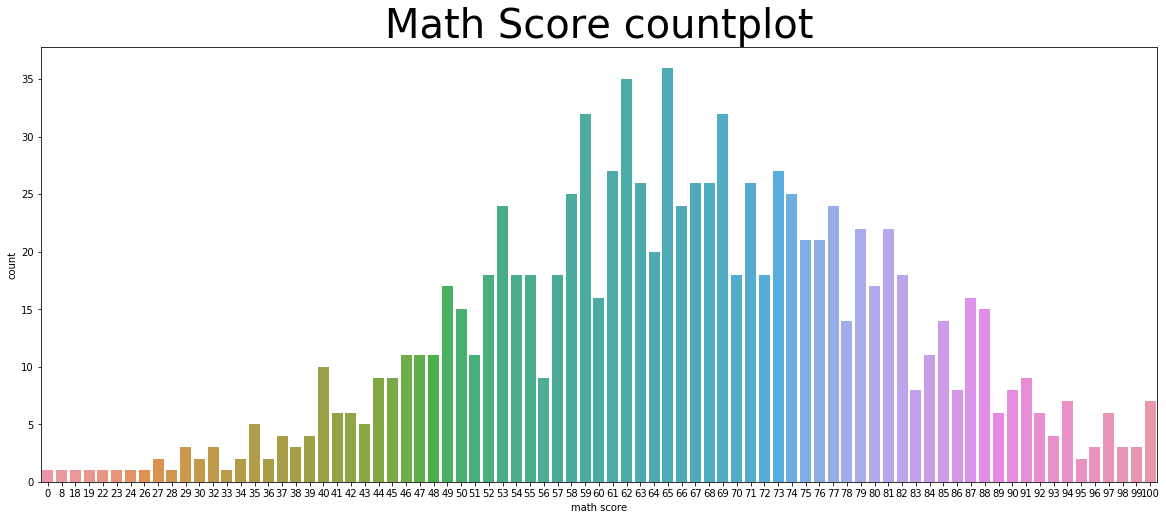

In [72]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['math score'])
plt.title('Math Score countplot',fontsize = 40)
plt.show()

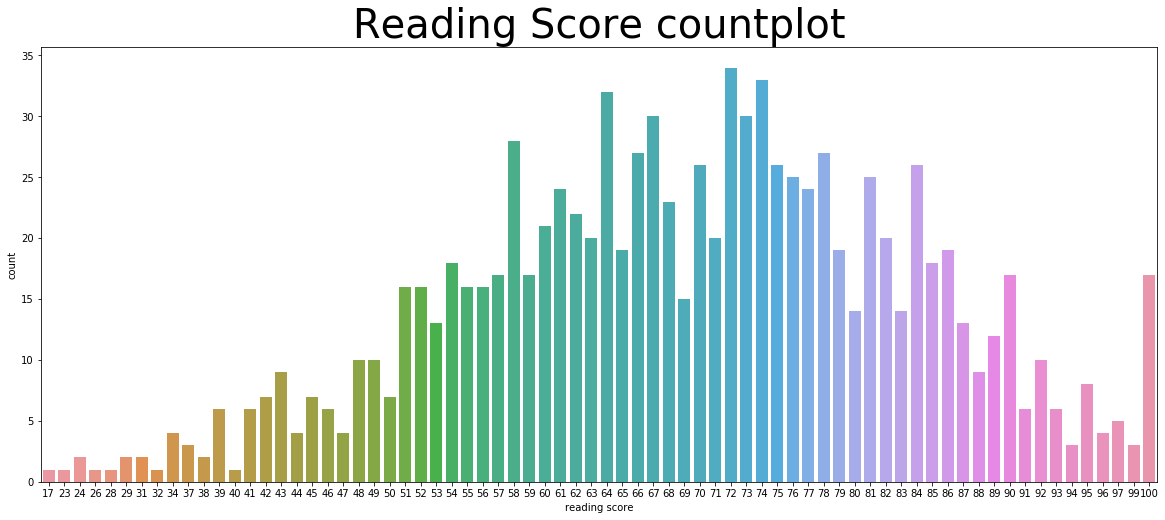

In [50]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['reading score'])
plt.title('Reading Score countplot',fontsize = 40)
plt.show()

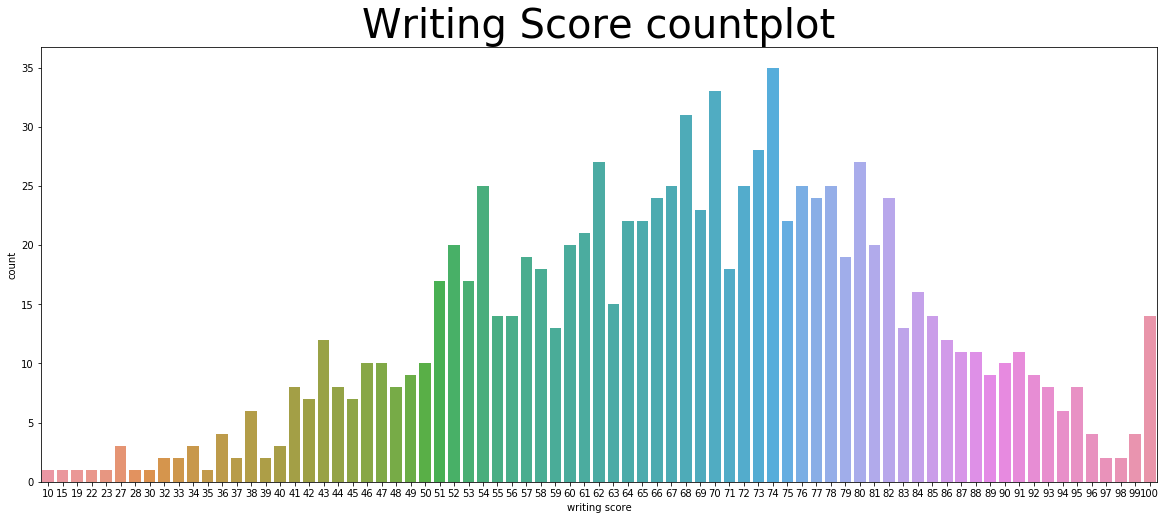

In [51]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['writing score'])
plt.title('Writing Score countplot',fontsize = 40)
plt.show()

Clearly, maximum students appear to have scored between 60-80 in all 3 subjects.
<h3> Let's confirm this with violin plots </h3>

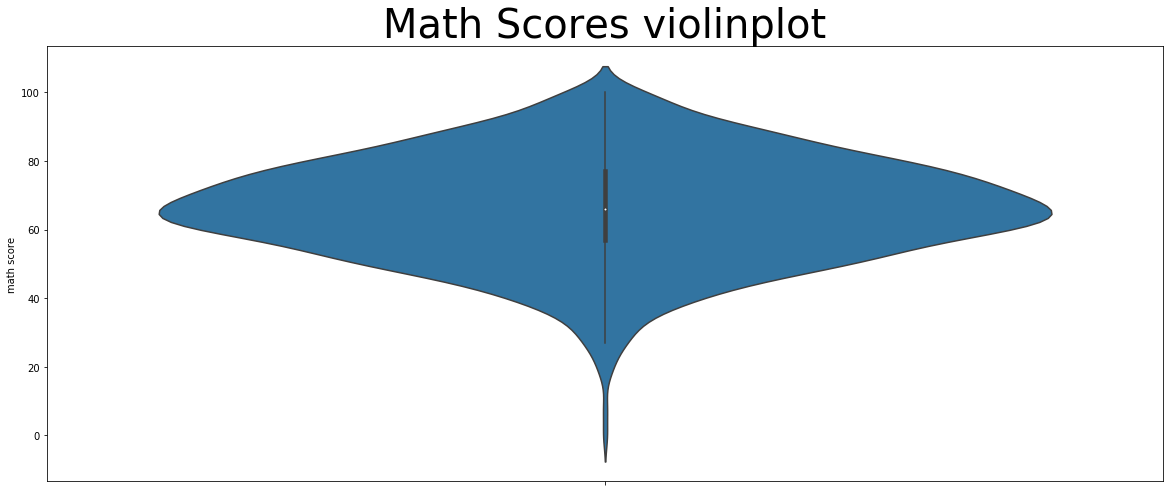

In [52]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.title('Math Scores violinplot', fontsize=40)
sns.violinplot(y='math score',data=df)
plt.show()

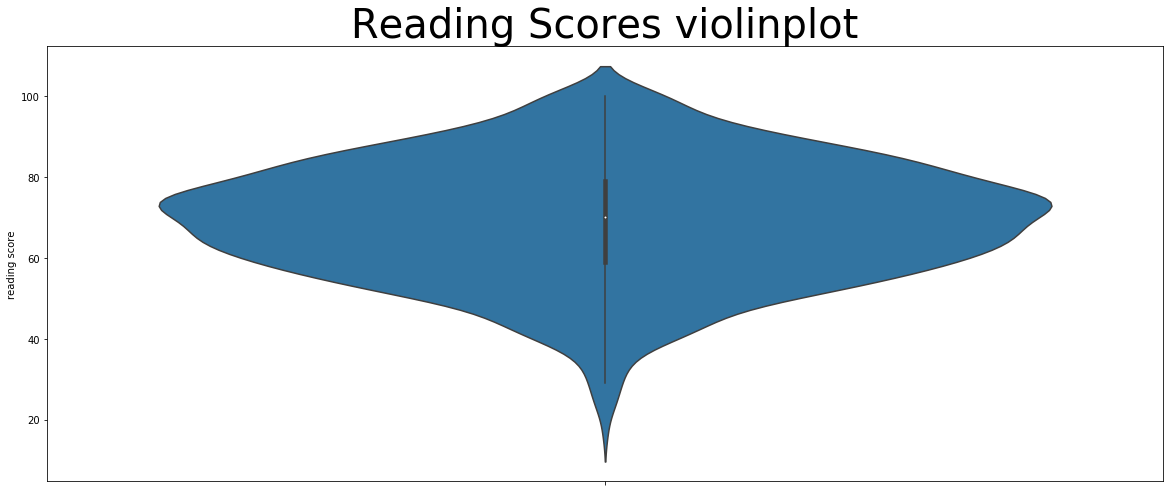

In [53]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.title('Reading Scores violinplot', fontsize=40)
sns.violinplot(y='reading score',data=df)
plt.show()

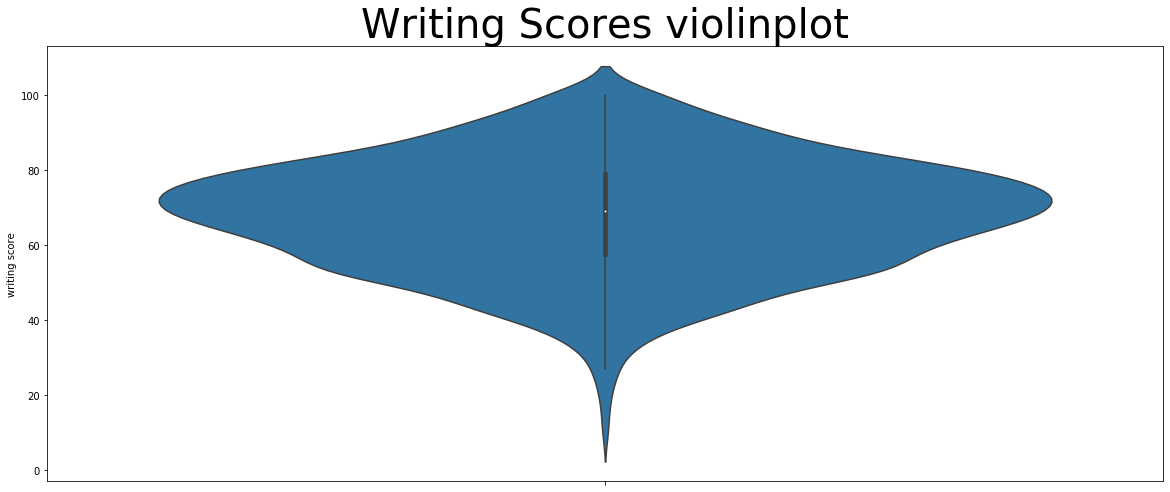

In [54]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.title('Writing Scores violinplot', fontsize=40)
sns.violinplot(y='writing score',data=df)
plt.show()

<h4> Clearly, majority of students have scored between 60 and 80, in <strong>all</strong> 3 subjects.</h4>




<h3>Now, I'll analyze our other variables, which are all categorical. So for each, I'll plot a pie chart and see which category(ies) in each categorical variable accounts for what proportion in that category.</h3>

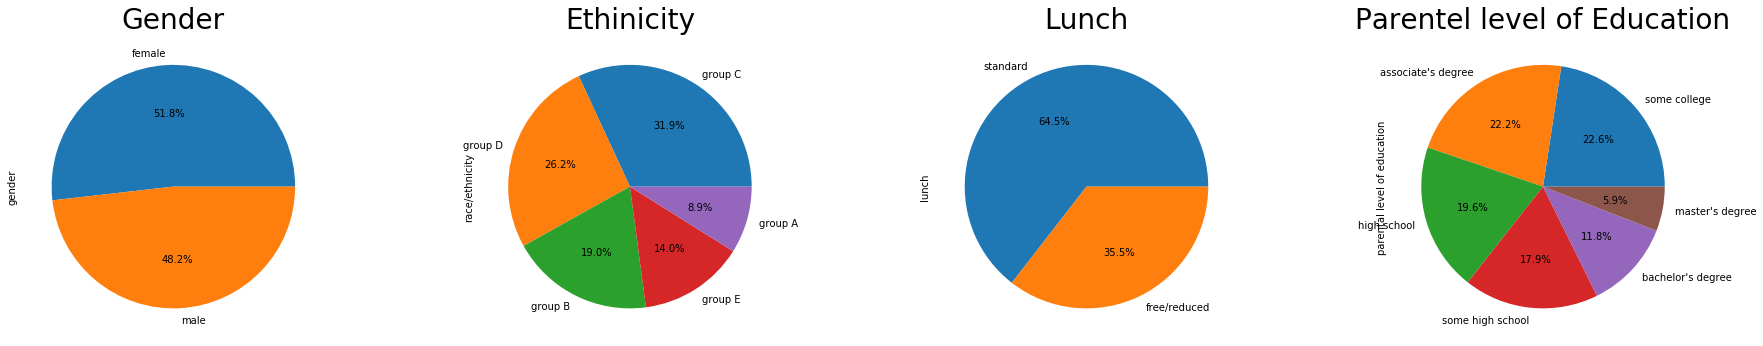

In [42]:
# Pie plot for each category

plt.figure(figsize=(30,15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Gender',fontsize = 28)
df['gender'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(142)
plt.title('Ethinicity',fontsize = 28)
df['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(143)
plt.title('Lunch',fontsize = 28)
df['lunch'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(144)
plt.title('Parentel level of Education',fontsize = 28)
df['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Here's what we can derive so far:

<p>1) 64.5%, that is majority of students have standard lunch. <strong>35.5% students aren't that well off.</strong></p>
<p>2) Females are slightly more than males, but it's pretty much the same.</p>
<p>3) Groups C and D ethnicities have more students.</p>
<p>4) Parental level of education for many students is some college, and associate's degree.</p>


<p><strong>Now, let's see if observing the perfomances of girls and boys separately in all 3 subjects can give us any conclusions:</strong> </p>

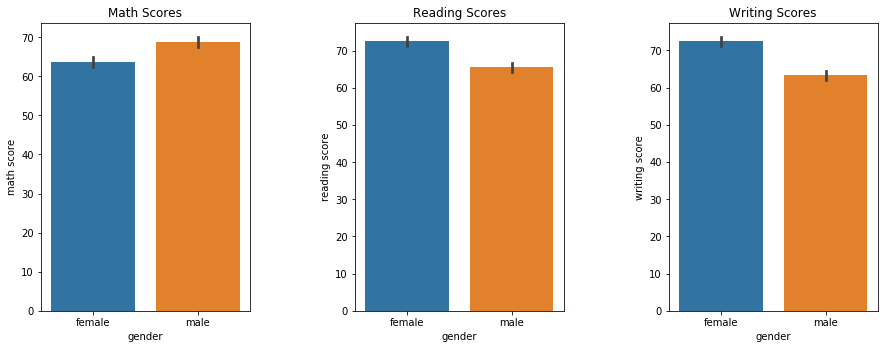

In [55]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="gender", y="math score", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(x="gender", y="reading score", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(x="gender", y="writing score", data=df)
plt.show()

So, clearly, male students did better in Math, and female students did better in reading & writing.

<p> Now, let's take into consideration our next variable: <strong>Test preparation course.</strong></p>
<p> Does it impact the performances of students?

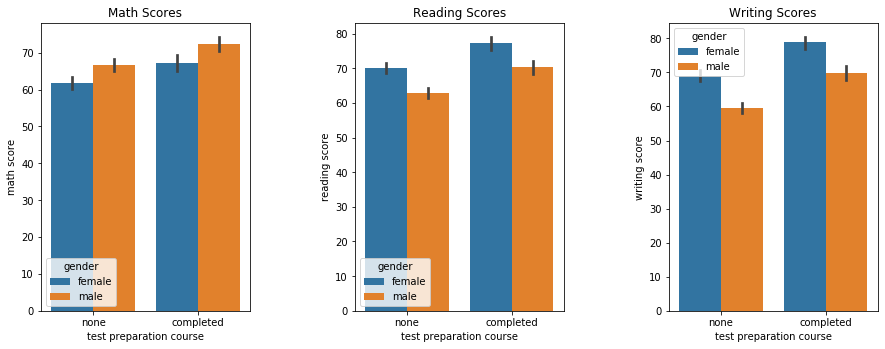

In [56]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="gender", y="math score", x="test preparation course", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="gender", y="reading score", x="test preparation course", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="gender", y="writing score", x="test preparation course", data=df)
plt.show()

<h3> Clearly, students of both genders performed better in all 3 subjects after taking the test preparation course.</h3>

Now, let's also consider the <strong>race/ethnicity</strong> parameter in this same analysis.

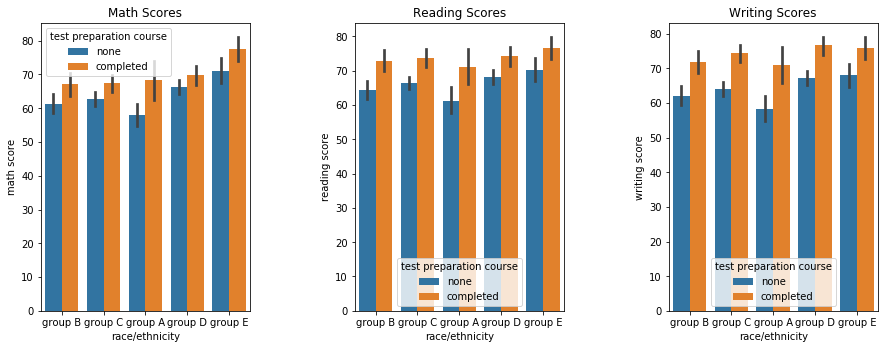

In [57]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="race/ethnicity", y="math score", hue="test preparation course", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="test preparation course", y="reading score", x="race/ethnicity", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="test preparation course", y="writing score", x= 'race/ethnicity',data=df)

plt.show()So

<h4> Clearly, test prepartion has upped the scores on an average of students of all races in all subjects. </h4>

Maximum students who took up Reading and Math test preparation courses were from <strong> group E </strong> and in Writing, <strong> group D. </strong>

Also, group E students have scored more in math, even the ones who didn't take up the test preparation course.


Now, let's analyze relationship between Test preparation course and other variables.

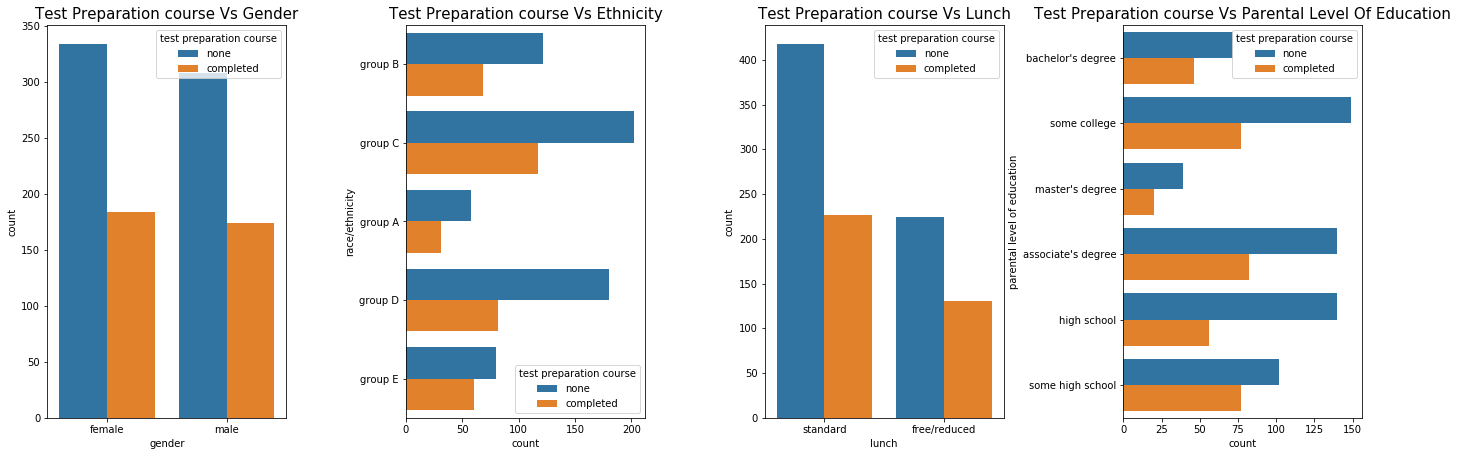

In [58]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
plt.title('Test Preparation course Vs Gender',fontsize = 15)
sns.countplot(hue="test preparation course", x="gender", data=df)

plt.subplot(254)
plt.title('Test Preparation course Vs Parental Level Of Education',fontsize = 15)
sns.countplot(hue="test preparation course", y="parental level of education", data=df)

plt.subplot(253)
plt.title('Test Preparation course Vs Lunch',fontsize = 15)
sns.countplot(hue="test preparation course", x="lunch", data=df)

plt.subplot(252)
plt.title('Test Preparation course Vs Ethnicity',fontsize = 15)
sns.countplot(hue="test preparation course", y="race/ethnicity", data=df)

plt.show()


So,

Most of the students have not completed the test preparation course.

Highest number Students who belong to group C ethinicity have completed the test preparation course.

Standard lunch students have completed the test preparation course

Students whos parental level of education is 'some college, 'associate's degree', and high school have completed the test preparation course.

<ul> A few more conclusions:
    <li>Students with standard lunch were better performers.</li>
    <li>Most guys perform well in maths and girls in literature, however considering the total scores girls win.</li>
    <li>Parents with better degrees preferred usually to not send their children for preparation courses.</li>
    
 </ul>